In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
from stockfish import Stockfish
import chess
import math
import random
from evaluation_pipeline_copy import *
from plot_functions import *
from scipy.special import rel_entr

import matplotlib.pyplot as plt
import chess.engine


In [3]:
# Load the data
df = pd.read_csv(r"chessData.csv")

data = generate_synthetic_data_dict(10,1,df,1)

moves = generate_synthetic_data_dict(10,4,df,1)
scores = ensemble_score(moves, df)

stockfish_score = stockfish_score_function(data, df)

c:\Users\nunni\miniconda3\envs\venv-fagprojekt\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


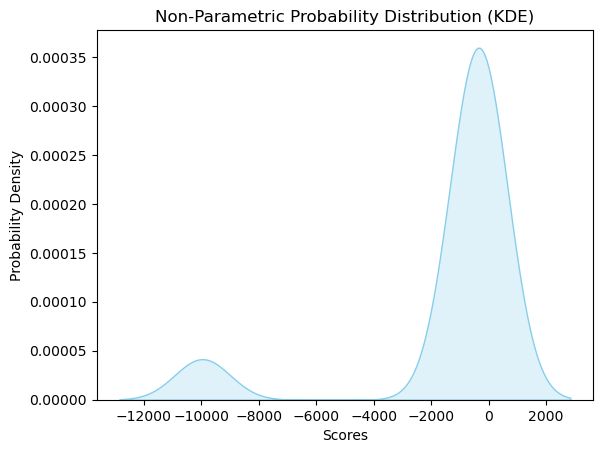

c:\Users\nunni\miniconda3\envs\venv-fagprojekt\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


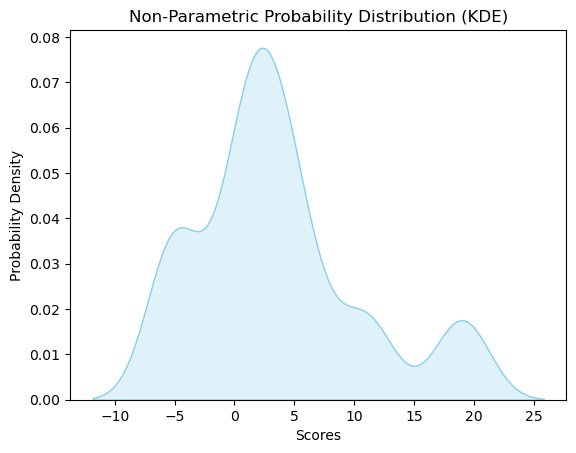

In [4]:
x_grid1, kde_values_ensemble = distribution_plot(scores)
x_grid2, kde_values_stockfish = distribution_plot(stockfish_score)

c:\Users\nunni\miniconda3\envs\venv-fagprojekt\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nunni\miniconda3\envs\venv-fagprojekt\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


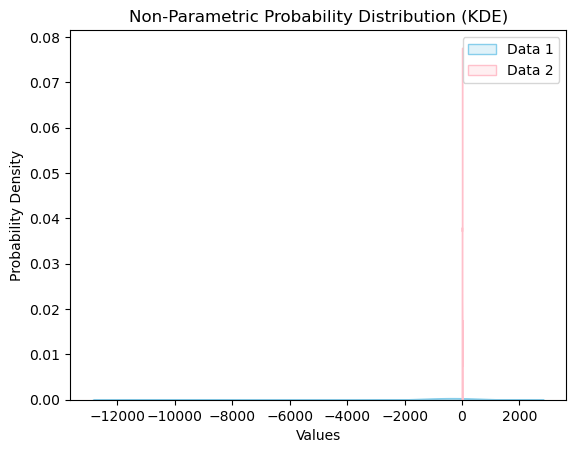

In [5]:
x_grid1, kde_values_ensemble, x_grid2, kde_values_stockfish = distribution_plot(scores, stockfish_score)

In [6]:
KL = sum(rel_entr(kde_values_stockfish, kde_values_ensemble))
print(KL)

290.82619368697806
